# 워드클라우드

* 프로세스
    1. 데이터로드 
    - 데이터 탐색
    - 분석 범주 선정
    - 텍스트 전처리(이메일, ip주소, 특수기호 제거)
    - 형태소 분석
    - 빈도표 확인
    - 워드클라우드 설정 및 그리기

**1.데이터로드**

In [1]:
import pandas as pd

#글자 더 많이 보이는 옵션
pd.set_option('display.max_colwidth',100)

#데이터 로드
data1 = pd.read_csv("/home/lab543/jupyter/jinyoung/data/jungmol.csv")
data2 = pd.read_csv("/home/lab543/jupyter/jinyoung/data/ufc.csv")

data = pd.concat([data1,data2])

#데이터 탐색
print("관측치 수:"+str(len(data)))
data.head(2)

관측치 수:10744


,keyword,category,date,title,username,content,click,link,channel,site
0,유노윤호,default,2019-12-26,NaN,Kumii0309,Yunho as the leader for 16 years you've always being there for everyone and guided @TVXQ to the ...,12,https://twitter.com/Kumii0309/status/1210036818327961600,undefined,twitter
1,오정세,default,2019-11-15,명품 조연들,ㅇㅇ,드라마 꿀잼 개존잼인데주연 배우들은 물론 조연 배우들도 연기 존잘임 ㅜ게다가 극중 캐릭터들의 깨알 디테일도 잘 살리고연기 구멍이 음슴존재감 뽐내는 명품 조연들을 ARA...,11752,https://pann.nate.com//talk/348291224,default,natePann


In [2]:
#필요 컬럼 선정
data = data[['keyword','date','site','title','content','link']]

**2.데이터 탐색**

In [3]:
#키워드
data = data[data['keyword']!='김동현']
data['keyword'].value_counts()

오정세        3155
유노윤호       3118
김동현 ufc     813
Name: keyword, dtype: int64

In [4]:
#날짜
min(sorted(data['date']))

'2019-10-01'

In [5]:
max(sorted(data['date']))

'2019-12-31'

In [6]:
#사이트
data['site'].value_counts()

dcinside     3915
naverNews    2792
twitter       301
natePann       77
Name: site, dtype: int64

In [7]:
#결측치
pd.isnull(data['title']).sum(), pd.isnull(data['content']).sum()

(301, 0)

In [8]:
#결측치 처리
data['title'] = data['title'].fillna('')

In [9]:
#재확인
pd.isnull(data['title']).sum(), pd.isnull(data['content']).sum()

(0, 0)

**3.분석 범주 선정**

In [10]:
k = '김동현 ufc'
keyword_data = data[data['keyword'] == k].reset_index().drop(['index'], axis =1)

**4.텍스트 전처리(이메일, ip주소, 특수기호, 숫자 제거)**

In [11]:
text_data = keyword_data['title']+' '+keyword_data['content']

In [12]:
import re

url = "(https?://)?(www.)?[a-zA-Z0-9./?=&-_]+[.]?[/][a-zA-Z0-9./?=&-_%]+"
email = "[-_.+a-zA-Z0-9]+[@].+[.][[a-zA-Z0-9]+|[a-zA-Z0-9]+[.][a-zA-Z0-9]+]"

for i in range(len(text_data)):
    text_data[i] = re.sub(url,"", text_data[i])
    text_data[i] = re.sub(email,"", text_data[i])
    text_data[i] = re.sub("[^가-힣a-zA-Z ]","", text_data[i])
    text_data[i] = text_data[i].lower()

**5.형태소 분석**

In [13]:
import time
from khaiii import KhaiiiApi

# 보완 필요 - 1차원적인 해결법
text_data = text_data[(text_data != '  ')&(text_data != '   ')].reset_index().drop(['index'],axis=1)
text_data = text_data[0]

noun ='[ㄱ-ㅎ가-힣a-zA-Z]{2,}(?=\/NNG)|[ㄱ-ㅎ가-힣a-zA-Z]{2,}(?=\/NNP)'
forign = '[ㄱ-ㅎ가-힣a-zA-Z]{2,}(?=\/SL)'
adjective = '[ㄱ-ㅎ가-힣a-zA-Z]{2,}(?=\/VA)'
verb = '[ㄱ-ㅎ가-힣a-zA-Z]{2,}(?=\/VV)'

word = list()
n = re.compile(noun+'|'+forign+'|'+adjective+'|'+verb)

start = time.time()

for i in range(len(text_data)):
    for text in KhaiiiApi().analyze(text_data[i]):
        temp = str(text).split("\t")[1].split('+')
        word.extend(n.findall(str(temp)))

print("time:",time.time() - start)

time: 4.663925647735596


**6.빈도표 확인**

In [78]:
# 생성
word_count = pd.DataFrame(word, columns=['word']).groupby('word').size().reset_index(name='count').sort_values(['count'], ascending=False).reset_index(drop=True)

In [79]:
#단어 수정
word_count.loc[word_count['word'] == '이기','word'] = '이긴'
word_count.loc[word_count['word'] == '모르','word'] = '모른'
word_count.loc[word_count['word'] == '배우','word'] = '배운'
word_count.loc[word_count['word'] == '다르','word'] = '다른'
word_count.loc[word_count['word'] == '버티','word'] = '버틴'
word_count.loc[word_count['word'] == '좋아하','word'] = '좋아한'
word_count.loc[word_count['word'] == '가르치','word'] = '가르친'

#불용어 제거
add_line = list()
add_line.extend(['dc','official','app','한국','사람','생각','정도','그렇','상대','진짜','나오','싸우','mma','국내','체급','코빙턴',\
                 '새끼','가능','시절','그러','비달','보이','수준','스파링','부산','kg','본인','랭킹','마스','훈련','vs','정찬',\
                 '정찬성','선수','팀매드','웰터','약물','최두호','정다운','중량','레슬링','이상','어떻','디아즈','코좀','매미',\
                 '만들','이유','걸리','강경호','미국','김동현이','위권','지금','라운드','가지','세계','이렇','병신',\
                '한국인','느끼','원래','세로니','자체','당시','논리','평체','프로','비교','마이아','이후','만나','이번','사실',\
                 'fc','추성','결국','코치','네이트','해외','일본','평가','주짓수','로드','랭커','마동현','ko','출신','실전',\
                 '영상','양동','경우','현역','대하','커리','느낌','다니','나라','그리','거임','김동현v','위하','성훈','개인',\
                 '아시아','강호동','좆밥','존나','기준','떡밥','그때','체중','대부분','tv','찬성','서울','알리','체육관','취급',\
                 '애초','끝나','양감독','올리','동현','미들급','얘기','정리','나가','당하','심하','사피딘','자신','이미지','예상',\
                 '일반','시간','털리','헤비','요즘','순위','시합','시작','오늘','채널','우스','우리나라','판정','타이틀','진출',\
                 '후배','리거','복싱','박준용','축구','인터뷰','이트','활동','근대','정답','붙이','언급','관심','감독','동양인',\
                 '맞추','현실','준비','시키','김민수','세로','절대','펀치','그래플링','에드가','박지성','약하','차이','운영','임현규',\
                 '톰슨','조건','최홍','하빕','부족','동양',])

for i in range(len(add_line)):
    word_count = word_count[word_count['word'] != add_line[i]].reset_index().drop(['index'],axis = 1)
    
import numpy as np

new_count = word_count.groupby(['word']).sum().sort_values(['count'], ascending=False).astype(int)['count']
new_word = word_count.groupby(['word']).sum().sort_values(['count'], ascending=False).index
word_count = pd.DataFrame(list(zip(new_word,new_count)),columns=['word','count'])

In [80]:
word_count[:50]

,word,count
0,김동현,920
1,ufc,326
2,경기,108
3,이긴,103
4,타격,84
5,예능,67
6,격투기,61
7,모른,46
8,방송,42
9,유튜브,39


In [95]:
#검색
pd.set_option('display.max_colwidth',100)
w = '문제'
keyword_data[keyword_data['content'].str.contains(w)].head(3)

,keyword,date,site,title,content,link
180,김동현 ufc,2019-12-25,dcinside,김동현 너무 깎아내려도 안되는게 웰라운더는 잘 잡았음,전적 중에 아미르 사돌라 해서웨이 파울로 티아고 이런애들 잡은거 보면 어지간한 중위권정도 그래플링가진 상대는 다 잡은거임 문제는 그래플러가 극상성이라서 타렉사피딘 정도 그...,https://gall.dcinside.com/mgallery/board/view/?id=ufc&no=135189
248,김동현 ufc,2019-12-22,dcinside,위몽골 까는 좆밥들의 어설픈 논리들,[1]취미로 운동하는 위몽골이 스파링해서 잘 하면상대는 봐준게 되고 위몽골은 전력으로 한게 되는 그 논리 ㅋㅋ위몽골이 못하고 상대가 잘하면 ... 역시 그럼그렇지.. 요딴...,https://gall.dcinside.com/mgallery/board/view/?id=popkontv&no=13026
256,김동현 ufc,2019-12-22,dcinside,확실히 대중한테 인정받을려면 예능을 해야함. 그래야 커리어도 오름,인터넷에서 강호동 전성기 시절은 무슨 알렉산더카렐린 두손가락으로 접어버릴만큼 과장 되어있음국내무대만 있는 씨름에서 최정점 찍었지만 그게 역대 커리어도 아니고 강호동 그당시...,https://gall.dcinside.com/mgallery/board/view/?id=ufc&no=133115


**7.워드클라우드 설정 및 그리기**

In [96]:
import numpy as np
from PIL import Image
import requests

# 폰트 타입
font_path = '/home/lab543/jupyter/fonts/NotoSansCJKkr-Bold.otf'

# 워드 모양
url = 'https://www.mandarinstone.com/app/uploads/2017/09/Geometric-Cube-Decor-Ebony_Dove_White-Swatch.jpg'

mask = np.array(Image.open(requests.get(url, stream=True).raw))

In [97]:
word_dict = dict()
for i in range(50):
    word_dict[word_count['word'][i]] = word_count['count'][i]

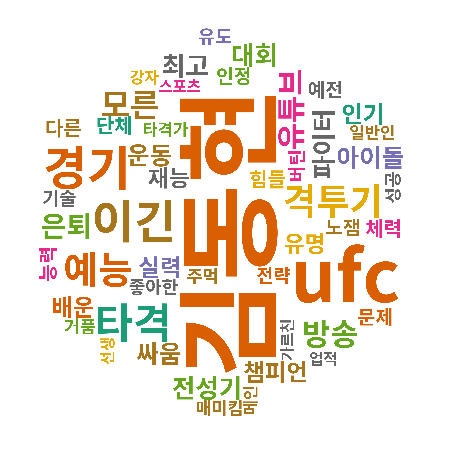

In [98]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

%matplotlib inline
wc = WordCloud(font_path = font_path,
               min_font_size = .5,
               colormap = 'Dark2',
               background_color='white', 
               width=800,
               height=800,
               mask = mask)

cloud = wc.generate_from_frequencies(word_dict)
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)